Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:
Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.

(https://archive.ics.uci.edu/ml/datasets/Wine).

In [3]:
import pandas as pd

# URL of the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Column names for the dataset


# Load the dataset into a pandas DataFrame
wine_df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the DataFrame
print(wine_df.head())


   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [4]:
wine_df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
# Assuming 'Class' is the target variable
X = wine_df.drop("Class", axis=1)  # Features
y = wine_df["Class"]                # Target variable


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Check for missing values
missing_values = wine_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Assuming there are no missing values in the Wine dataset
# If there were missing values, you could use imputation strategies like mean, median, or constant

# If there were missing values, impute them using the mean
# imputer = SimpleImputer(strategy='mean')
# X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the first few rows of the scaled features
print("Scaled Features:\n", X_scaled.head())


Missing Values:
 Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64
Scaled Features:
     Alcohol  Malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0 

## Implement PCA on the preprocessed dataset using the scikit-learn library.

In [7]:
from sklearn.decomposition import PCA

# Instantiate PCA with the desired number of components (e.g., 2 for visualization)
pca = PCA(n_components=2)

# Fit and transform the scaled features using PCA
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

# Display the first few rows of the PCA components
print("PCA Components:\n", pca_df.head())


PCA Components:
    Principal_Component_1  Principal_Component_2
0               3.316751              -1.443463
1               2.209465               0.333393
2               2.516740              -1.031151
3               3.757066              -2.756372
4               1.008908              -0.869831


## Determine the optimal number of principal components to retain based on the explained variance ratio.

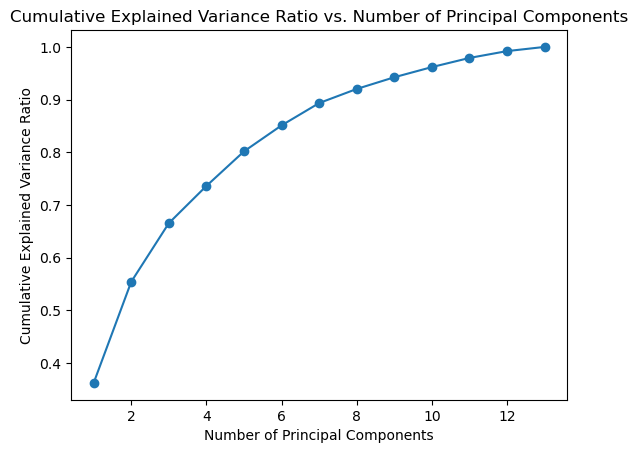

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA with all components
pca_all = PCA()
X_pca_all = pca_all.fit_transform(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca_all.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.show()



## Visualise the results of PCA using a scatter plot.

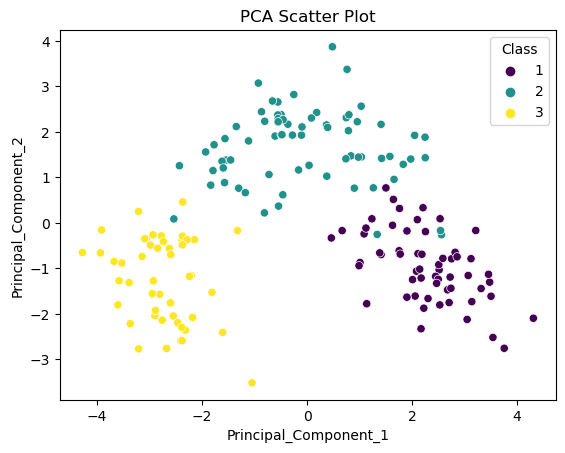

In [10]:
import seaborn as sns

# Add the target variable 'Class' to the PCA DataFrame
pca_df['Class'] = y

# Scatter plot using seaborn
sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2', hue='Class', data=pca_df, palette='viridis')
plt.title('PCA Scatter Plot')
plt.show()


## Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


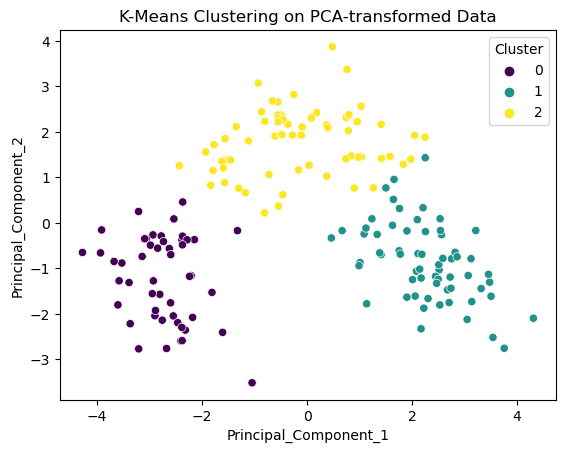

In [11]:
from sklearn.cluster import KMeans

# Assuming 'n_clusters' is the desired number of clusters
n_clusters = 3  # You can adjust this based on your specific requirements

# Fit K-Means to the PCA-transformed data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters using a scatter plot
sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering on PCA-transformed Data')
plt.show()


## Interpret the results of PCA and clustering analysis.